<a href="https://colab.research.google.com/github/jfernandez37/PCS2023/blob/main/PCS_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
846



1. What is your place of residence? (city/town)







2. What is your place of residence? (state)







3. What is your primary mode of transportation?







3b If you answered "Other" to question 3, please explain.







4._1 Do you have difficulty accessing forms of transportation in your area? If so, what forms? - Car







4._2 Do you have difficulty accessing forms of transportation in your area? If so, what forms? - Bus







4._3 Do you have difficulty accessing forms of transportation in your area? If so, what forms? - Passenger train







4._4 Do you have difficulty accessing forms of transportation in your area? If so, what forms? - Taxi (including Uber/Lyft rides)







4._5 Do you have difficulty accessing forms of transportation in your area? If so, what forms? - Bike with bike lanes







4._6 Do you have difficulty accessing forms of transportation in your area? If so, what forms? - Other







4b If y

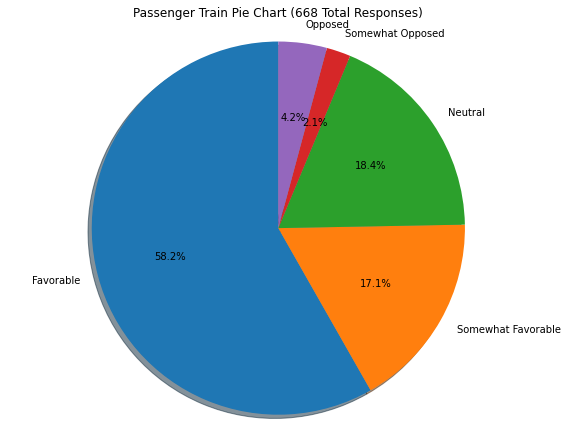

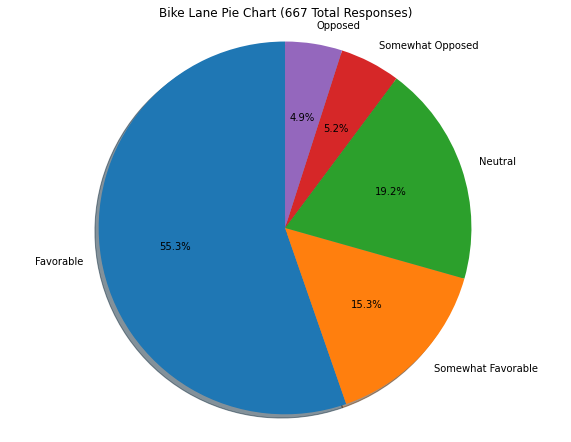

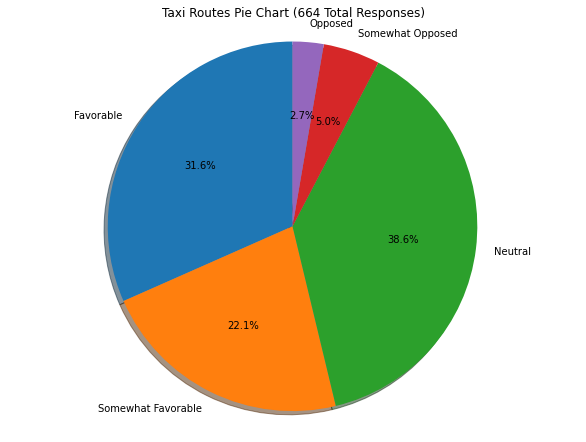

<BarContainer object of 5 artists>

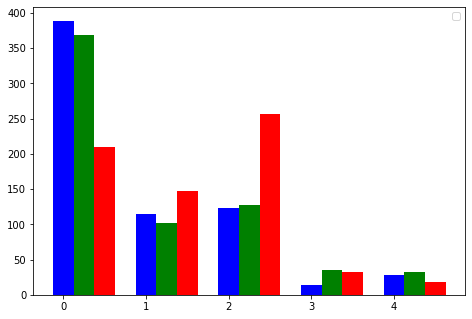

In [30]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
amtrakWords=["train","rail","amtrak","Train","Rail","Amtrak"]
delaware=["Deleware","Delware"]
noACount=0
aCount=0
trainCount=0
qid=-1
cities=[]
states=[]
allAns=[]
ansCount1=[]
ansCount2=[]
ansCount3=[]
for k in range(5):
    ansCount1.append(0)
    ansCount2.append(0)
    ansCount3.append(0)
allAns.append(ansCount1)
allAns.append(ansCount2)
allAns.append(ansCount3)
print(allAns)
df = pd.read_csv ('english.csv')
ansList=['7.','8.','9.']
questionTitles=['1.','2.', '3.', '3b','4._1', '4._2', '4._3', '4._4', '4._5', '4._6', '4b', '5._1','5._2','5._3','5._4','5._5','5._6','5b','6.','7.','8.','9.','10.','11.','12.','13.']
print(len(df))
for i in questionTitles:
    yesCount=0
    noCount=0
    totalA=0
    ansCount=[]
    for k in range(5):
      ansCount.append(0)
    print("\n\n\n"+i+" "+df[i].loc[0]+"\n\n\n")
    for j in range(2,len(df)):
        if(df[i].loc[j]==df[i].loc[j]):
            if i=="1.":
                if df[i].loc[j][len(df[i].loc[j])-1]==" ":
                    cityTemp=df[i].loc[j].capitalize()
                    cities.append(cityTemp[:-1])
                elif df[i].loc[j].capitalize()=="De - cheswold":
                    cities.append("Cheswold")
                elif df[i].loc[j].capitalize()=="Millsboro, de.":
                    cities.append("Millsboro")
                else:
                    cities.append(df[i].loc[j].capitalize())
            elif i=="2.":
                if df[i].loc[j][len(df[i].loc[j])-1]==" " and df[i].loc[j]!="Md " and df[i].loc[j].capitalize()!="Deleware ":
                    stateTemp=df[i].loc[j].capitalize()
                    states.append(stateTemp[:-1])
                elif df[i].loc[j]=="DE" or df[i].loc[j].capitalize()=="De" or ((df[i].loc[j][0]=="D" or df[i].loc[j][0]=="d")and df[i].loc[j]!="Delaware") or df[i].loc[j].capitalize()=="Deleware" or df[i].loc[j].capitalize()=="Us":
                    states.append("Delaware")
                elif df[i].loc[j]=="MD" or df[i].loc[j].capitalize()=="Md" or df[i].loc[j]=="Md ":
                    states.append("Maryland")
                else:
                    states.append(df[i].loc[j].capitalize())
            aCount+=1
            #print(df[i].loc[j]+"\n")#Prints out each answer for each question
            if str(df[i].loc[j])=="Yes":
                yesCount+=1
            elif str(df[i].loc[j])=="No":
                noCount+=1
            if i=='7.':
              qid=0
            elif i=='8.':
              qid=1
            elif i=='9.':
              qid=2
            else:
              qid=-1
            if qid!=-1:
              if str(df[i].loc[j])=="Favorable":
                  allAns[qid][0]+=1
              elif str(df[i].loc[j])=="Somewhat Favorable":
                  allAns[qid][1]+=1
              elif str(df[i].loc[j])=="Neutral":
                  allAns[qid][2]+=1
              elif str(df[i].loc[j])=="Somewhat Opposed":
                  allAns[qid][3]+=1
              elif str(df[i].loc[j])=="Opposed":
                  allAns[qid][4]+=1
        else:
            #print("No Answer\n")
            noACount+=1
        for w in amtrakWords:
            if w in str(df[i].loc[j]):
                #print(df[i].loc[j]+"\n")
                trainCount+=1
                break
    if i=="12.":
        print(str(yesCount) + " people answered yes to question " + i)
        print(str(noCount) + " people answered no to question " + i)
    print("")
print(Counter(cities))
print(Counter(states))
print("Number of english responses: " + str(len(df)-2))
print("There were a total of " + str(noACount)+" of blank responses and " +str(aCount)+" not blank responses in the english survey")
print(str(noACount+aCount)+" responses total for the english survey")
print(str((noACount/(noACount+aCount))*100)+"% of the english answers for all questions were blank")
print("Trains were talked about " +str(trainCount) + " times")
print(allAns)
labels='Favorable','Somewhat Favorable', 'Neutral', 'Somewhat Opposed', 'Opposed'
totalAns=[]
for i in range(3):
  totalAns.append(0)
  for j in allAns[i]:
    totalAns[i]+=j
for i in range(3):
  titleGraph=""
  fig1, ax1=plt.subplots()
  if i==0:
    titleGraph="Passenger Train"
  elif i==1:
    titleGraph="Bike Lane"
  elif i==2:
    titleGraph="Taxi Routes"
  plt.title(titleGraph + " Pie Chart (" +str(totalAns[i]) +" Total Responses)")
  ax1.pie(allAns[i], labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
  ax1.axis('equal')
  fig1.tight_layout(pad=-7)
  plt.rcParams['axes.facecolor'] = 'w'
  plt.rcParams['savefig.facecolor'] = 'w'
  plt.show()
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.legend(labels=['Passenger Train', 'Bike Lane', 'Taxi Routes'])
ax.bar(X + 0.00, allAns[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, allAns[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, allAns[2], color = 'r', width = 0.25)